In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [79]:
df = pd.read_csv("bangalore_homeprices.csv")
df.shape
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [80]:
data = np.asarray(df)
data

array([[1.056e+03, 2.000e+00, 3.907e+01],
       [2.600e+03, 4.000e+00, 1.200e+02],
       [1.440e+03, 3.000e+00, 6.200e+01],
       [1.521e+03, 3.000e+00, 7.500e+01],
       [1.200e+03, 2.000e+00, 5.100e+01],
       [1.170e+03, 2.000e+00, 3.800e+01],
       [2.732e+03, 4.000e+00, 1.350e+02],
       [3.300e+03, 4.000e+00, 1.550e+02],
       [1.310e+03, 3.000e+00, 5.000e+01],
       [3.700e+03, 5.000e+00, 1.670e+02],
       [1.800e+03, 3.000e+00, 8.200e+01],
       [2.785e+03, 4.000e+00, 1.400e+02],
       [1.000e+03, 2.000e+00, 3.800e+01],
       [1.100e+03, 2.000e+00, 4.000e+01],
       [2.250e+03, 3.000e+00, 1.010e+02],
       [1.175e+03, 2.000e+00, 4.200e+01],
       [1.180e+03, 3.000e+00, 4.800e+01],
       [1.540e+03, 3.000e+00, 6.000e+01],
       [2.770e+03, 3.000e+00, 1.020e+02],
       [8.000e+02, 1.000e+00, 3.200e+01]])

In [81]:
sample_data = np.random.shuffle(data)
sample_data = data[:10,:]

In [82]:
sample_data

array([[2.732e+03, 4.000e+00, 1.350e+02],
       [8.000e+02, 1.000e+00, 3.200e+01],
       [1.440e+03, 3.000e+00, 6.200e+01],
       [1.000e+03, 2.000e+00, 3.800e+01],
       [2.770e+03, 3.000e+00, 1.020e+02],
       [1.170e+03, 2.000e+00, 3.800e+01],
       [3.300e+03, 4.000e+00, 1.550e+02],
       [2.600e+03, 4.000e+00, 1.200e+02],
       [1.175e+03, 2.000e+00, 4.200e+01],
       [1.310e+03, 3.000e+00, 5.000e+01]])

In [83]:
sample_data
sample_data.shape

(10, 3)

In [84]:
X = sample_data[:,:2]
X

array([[2.732e+03, 4.000e+00],
       [8.000e+02, 1.000e+00],
       [1.440e+03, 3.000e+00],
       [1.000e+03, 2.000e+00],
       [2.770e+03, 3.000e+00],
       [1.170e+03, 2.000e+00],
       [3.300e+03, 4.000e+00],
       [2.600e+03, 4.000e+00],
       [1.175e+03, 2.000e+00],
       [1.310e+03, 3.000e+00]])

In [85]:
y = sample_data[:,2]
y
y.shape

(10,)

In [90]:
y = sample_data[:,2]
y

array([135.,  32.,  62.,  38., 102.,  38., 155., 120.,  42.,  50.])

In [91]:
sx = MinMaxScaler()
sy = MinMaxScaler()
X = sx.fit_transform(X)
X

array([[0.7728    , 1.        ],
       [0.        , 0.        ],
       [0.256     , 0.66666667],
       [0.08      , 0.33333333],
       [0.788     , 0.66666667],
       [0.148     , 0.33333333],
       [1.        , 1.        ],
       [0.72      , 1.        ],
       [0.15      , 0.33333333],
       [0.204     , 0.66666667]])

In [94]:
y = sy.fit_transform(y.reshape(-1,1))
y

array([[0.83739837],
       [0.        ],
       [0.24390244],
       [0.04878049],
       [0.56910569],
       [0.04878049],
       [1.        ],
       [0.71544715],
       [0.08130081],
       [0.14634146]])

In [95]:
y = y.reshape(10,)
y

array([0.83739837, 0.        , 0.24390244, 0.04878049, 0.56910569,
       0.04878049, 1.        , 0.71544715, 0.08130081, 0.14634146])

In [151]:
# time to implement mini batch gradient descent
def mini_batch_gradient_descent(data, epochs, learning_rate = 0.5):
    
    w = np.ones(scaled_data.shape[1]-1)
    b = 0
    total_samples = 5
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        sample_data = np.random.shuffle(data)
        sample_data = data[:5,:]
        xi = sample_data[:,:2]
        yi = sample_data[:,2]
        X = sx.fit_transform(xi)
        y_true = sy.fit_transform(yi.reshape(-1,1))
        y_true = y_true.reshape(total_samples,)
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        print(X,y_true)
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        print("w:",w , "b:",b , "cost:",cost)
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
        
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(data,100)
w, b, cost

[[0.05773672 0.        ]
 [0.         0.        ]
 [0.1039261  0.5       ]
 [0.17898383 0.5       ]
 [1.         1.        ]] [0.02061856 0.         0.10309278 0.12371134 1.        ]
w: [0.76928449 0.69438942] b: -0.4186447941715674 cost: 0.3121078616085697
[[0.2220937  0.5       ]
 [1.         1.        ]
 [0.69057259 0.5       ]
 [0.43030654 0.5       ]
 [0.         0.        ]] [0.22718716 1.         0.61359358 0.4253443  0.        ]
w: [0.80146232 0.73011831] b: -0.2544522335544983 cost: 0.048950352873375076
[[0.      0.     ]
 [1.      1.     ]
 [0.1125  0.5    ]
 [0.78125 0.5    ]
 [0.10625 0.     ]] [0.         1.         0.12195122 0.76829268 0.        ]
w: [0.75278939 0.66996494] b: -0.2345834690629892 cost: 0.03548302377212699
[[0.         0.        ]
 [0.0657277  0.5       ]
 [0.01408451 0.        ]
 [1.         1.        ]
 [0.50704225 0.5       ]] [0.         0.1025641  0.11111111 1.         0.53846154]
w: [0.72119321 0.63323602] b: -0.1564720653137703 cost: 0.041628013092

(array([0.84022997, 0.11308086]), -0.057069062141442514, 0.005162547963086373)

In [152]:
def predict(area,bedrooms,w,b):
    
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [154]:
predict(2600,3,w,b)

114.51753584819566

In [155]:
predict(2250,2,w, b)

94.956889068967

In [156]:
predict(2500,3,w, b)

110.03804896725865

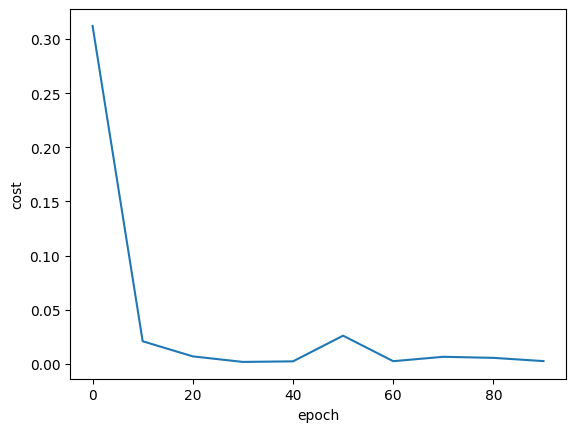

In [157]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)